# Session 4: Numpy and Pandas

## Numpy

Python lists are easy to use and versatile. Once you've mastered the basic syntax, array stuff in other languages will quickly become annoying. 

However, the downside of this flexibility is poor performance as the data cannot be efficiently arranged in the memory, nor vectorized or parallelized in obvious ways to support modern SIMD instruction extensions such as AVX2. This is where ``Numpy`` shines: Its goal is not only to provide methods and functions to simplify various sorts of everyday numerical operations, but also to provide a new data type that trades back a little bit of flexibility for a huge performance plus. Instead of lists, numpy uses arrays with a fixed data type such as ``double`` or ``int``. Python lists can directly be converted into arrays:

In [2]:
import numpy as np

ints = np.array( [1,1,2,3,5] )
floats = np.array( [1.,1.,2.,3.,5.] )

Accessing one-dimensional arrays is just like accessing list elements:

In [3]:
print(ints)
print(ints[0])
print(floats[-1])
print(floats[1:3])

[1 1 2 3 5]
1
5.0
[1. 2.]


Nested lists can be converted into 2d arrays. Accessing elements in such higher-dimensional arrays works similar like accessing nested lists, but we only have one set of brackets with comma-separated indices:

In [4]:
mat = np.array( [[1,2,3],[4,5,6],[7,8,9]] )

print(mat)
print()
print(mat.shape)
print()
print(mat[0,0])
print(mat[0,1])
print()
print(mat[:,0])
print(mat[0,:])
print()
print(mat[0:2,0:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

(3, 3)

1
2

[1 4 7]
[1 2 3]

[[1 2]
 [4 5]]


Elements can also be selected based on some condition:

In [5]:
sub = mat[mat%2==0]

print( sub.shape )
print( sub )

(4,)
[2 4 6 8]


The data type is chosen automatically but can also be set explicitly. To check the datatype, check the ``dtype`` attribute:

In [6]:
print(ints.dtype)
print(floats.dtype)

int64
float64


To create an array of zeros with some given dimensionality, use the ``zeros`` function:

In [7]:
arr0 = np.zeros(5)
arr1 = np.zeros([2,3], dtype="int")

print(arr0)
print(arr0.dtype)
print()
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[0. 0. 0. 0. 0.]
float64

[[0 0 0]
 [0 0 0]]
(2, 3)
int64


The default datatype is ``float64`` aka ``double``. To pre-set an array with ones instead of zeros, use the ``ones`` method while ``empty`` returns an un-initialized array. ``fill`` allows you to initialize an array with given dimension and some default value.

Naturally, ``Numpy`` has built-in functions to create linearly spaced elements. The two most common ones used are ``arange`` and ``linspace``:

In [8]:
vals1 = np.arange(0,5,0.5) # Just like the range function, but also works with float spacing
vals2 = np.linspace(0,5,11) # Generate 11 values between 0. and 5., including the borders

print(vals1, len(vals1))
print(vals2, len(vals2))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] 10
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ] 11


Where ``Numpy`` really shines is its support for all-array vector operations. For every mathematical function in Pythons ``math`` library there is a ``Numpy`` equivalent with the same name. As the ``Numpy`` functions also support normal datatypes such as integers, floats and lists, and generally give better performance thanks to the ```Intel Math Kernel Library (MKL)```, I recommend using the ``Numpy`` functions:

In [35]:
def f(x):
    return np.sin(x)

x = np.arange(0.,5.,1)
y = f(x) # The function f is applied to all values in the array x
print(x,y)

[0. 1. 2. 3. 4.] [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]


As you might have expected, ``Numpy`` arrays are compatible with ``Matplotlib``.

Thanks to ``Numpy``, we can manipulate entire arrays in a single line of code:

In [10]:
x = x**2 + y + 3. # Square every entry of x, add y element-wise and add 3 to every element
z = np.sqrt(np.arange(0,30,1))
print(z)

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.         3.16227766 3.31662479
 3.46410162 3.60555128 3.74165739 3.87298335 4.         4.12310563
 4.24264069 4.35889894 4.47213595 4.58257569 4.69041576 4.79583152
 4.89897949 5.         5.09901951 5.19615242 5.29150262 5.38516481]


Numpy provides a plethora of all-array functions that help to get a first impression of the data:

In [11]:
print("Maximum: {0:f}".format(np.max(z)))
print("Minimum: {0:f}".format(np.min(z)))
print("Sum: {0:f}".format(np.sum(z)))
print("Average: {0:f}".format(np.mean(z)))
print("Standard deviation: {0:f}".format(np.std(z)))
print("Median: {0:f}".format(np.median(z)))

Maximum: 5.385165
Minimum: 0.000000
Sum: 106.605620
Average: 3.553521
Standard deviation: 1.368390
Median: 3.807320


``Numpy`` also provides solutions for your everyday linear algebra problems:

In [12]:
vecA = np.array( [2,-1,4] )
vecB = np.array( [-1,-2,5] )

matA = np.array( [[2,-1,4],[-1,-2,5],[4,-2,8]] )

print("Cross-product of vectors A and B:", np.cross(vecA,vecB))
print("Matrix A times vector A: \n", np.dot(matA, vecA))
print("Matrix A squared: \n", np.dot(matA, matA))
print("Determinant of Matrix A:", np.linalg.det(matA))

Cross-product of vectors A and B: [  3 -14  -5]
Matrix A times vector A: 
 [21 20 42]
Matrix A squared: 
 [[ 21  -8  35]
 [ 20  -5  26]
 [ 42 -16  70]]
Determinant of Matrix A: 0.0


``Numpy`` also provides functions to get data into files and back into your RAM:

In [13]:
def poly(x,a):
    return x**a

x = np.arange(0,1,0.01)
a = np.arange(0,3.5,0.5)

lines = len(x)
cols = len(a)
data = np.zeros( [lines,cols] )
print(data.shape)

for i in range(lines):
    for j in range(cols):
        data[i,j] = poly(x[i],a[j])


(100, 7)


In [14]:
dataExp = np.insert(data,0,x,axis=1) # Append x values as first column

print(dataExp.shape)

np.savetxt("data.txt", dataExp) #np.save >>> saves in binary, nicer/less overhead when work is internal and humans won't look at it

(100, 8)


In [15]:
data = np.loadtxt("data.txt")

print(data.shape)

(100, 8)


In [16]:
x = data[:,0] # Extract the first column

sqt = data[:,2] # Extract the third column
lin = data[:,3]
quad = data[:,5]

print(sqt)

[0.         0.1        0.14142136 0.17320508 0.2        0.2236068
 0.24494897 0.26457513 0.28284271 0.3        0.31622777 0.33166248
 0.34641016 0.36055513 0.37416574 0.38729833 0.4        0.41231056
 0.42426407 0.43588989 0.4472136  0.45825757 0.46904158 0.47958315
 0.48989795 0.5        0.50990195 0.51961524 0.52915026 0.53851648
 0.54772256 0.55677644 0.56568542 0.57445626 0.58309519 0.59160798
 0.6        0.60827625 0.6164414  0.6244998  0.63245553 0.64031242
 0.64807407 0.65574385 0.66332496 0.67082039 0.678233   0.68556546
 0.69282032 0.7        0.70710678 0.71414284 0.72111026 0.72801099
 0.73484692 0.74161985 0.74833148 0.75498344 0.76157731 0.76811457
 0.77459667 0.78102497 0.78740079 0.79372539 0.8        0.80622577
 0.81240384 0.81853528 0.82462113 0.83066239 0.83666003 0.84261498
 0.84852814 0.85440037 0.86023253 0.8660254  0.87177979 0.87749644
 0.88317609 0.88881944 0.89442719 0.9        0.90553851 0.91104336
 0.91651514 0.92195445 0.92736185 0.93273791 0.93808315 0.94339

# Pandas

``Numpy`` is just perfect when you're dealing with purely numerical data. But in the real-world, datasets regularly contain string-type arguments such as the date or some category which makes getting the data into your Python program somewhat more tricky (see ``np.genfromtxt``). In addition, working with ``Numpy`` indices feels more like C (or Fortran...) and is not entirely in line with *the zen of Python*, where we can work with such beautiful data structures as dictionaries that allow us to access data based on strings instead of indices. For instance, for a Python purist data in the popular CSV (comma-separated values) format seems to be predestined for reading into a dictionary where every column forms a list and can be accessed via the column header specified in the first line of the file: 

![CSV Header in Notepad++](csv_header.PNG "Title")

Here, we are dealing with time information in the English date format, floats, integers and nulls indicating days with either no trading or simply missing information. Python lists are flexible enough to deal with either, a simple function that does the trick of reading a CSV file into a dictionary just takes a few lines:

In [17]:
def loadCSV(fname):
    data = {}
    with open(fname, "r") as file:
        header = file.readline().rstrip().split(",")
        for head in header:
            data[head] = []
        for line in file:
            cols = line.rstrip().split(",")
            for col in zip(header,cols):
                try:
                    data[col[0]].append(float(col[1]))
                except:
                    data[col[0]].append(col[1])
    return data

Detecting the correct data type is where things start to get a little bit annoying, so I have even included some runtime error-checking to automatically convert all kinds of numerical data into floats with strings being the fallback option in case that the conversion fails.

In [18]:
data = loadCSV("Gold.csv")

print("Dictionary keys:", data.keys())

Dictionary keys: dict_keys(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])


Accessing and inspecting the data dictionary is convenient and straight-forward, we can even do some basic statistics:

In [19]:
print("Start date:", data["Date"][0])
print("End date:", data["Date"][-1])
print("Number of entries:", len(data["Date"]))
print("Missing entries", data["Open"].count("null"))

Start date: 2000-08-30
End date: 2021-03-15
Number of entries: 5231
Missing entries 112


More advanced numerical analysis fails because we're mixing floats and strings even within one column of data, so we would need to clean up our data dictionary first. But even then, stuff as list comprehensions over several columns quickly gets tiresome and brings back stuff, that we wanted to avoid: Working with indices ... 

Thankfully, Python provides a library that combines the speed of ``numpy`` with the flexibility and readability of simple Python structures: ``Pandas`` which is short for *Python Data Analysis Library*. Everything revolves around dataframes which consist of series, roughly equivalent to tables and columns. A dataframe can be created from nested lists where every element of the main list represents one line of the table. Pandas takes the column headers as a list of strings and creates a nice table:

In [20]:
import pandas as pd

month = ["Jan-2021", "Feb-2021", "Mar-2021"]
profit = [638, 436, 887]
debt = [-3554, -3145, -2901]

someData = list(zip(month,profit,debt))

df = pd.DataFrame(someData,columns=["Month","Profit","Debt"])
print(df)

      Month  Profit  Debt
0  Jan-2021     638 -3554
1  Feb-2021     436 -3145
2  Mar-2021     887 -2901


Dictionaries can be directly converted into dataframes:

In [21]:
df = pd.DataFrame(data)
print(df)

            Date         Open         High          Low        Close  \
0     2000-08-30   273.899994   273.899994   273.899994   273.899994   
1     2000-08-31   274.799988   278.299988   274.799988   278.299988   
2     2000-09-01        277.0        277.0        277.0        277.0   
3     2000-09-04         null         null         null         null   
4     2000-09-05   275.799988   275.799988   275.799988   275.799988   
...          ...          ...          ...          ...          ...   
5226  2021-03-09  1686.199951       1717.5  1685.199951  1716.599976   
5227  2021-03-10  1713.599976  1722.900024       1711.0       1721.5   
5228  2021-03-11  1725.599976       1737.5  1720.199951  1722.300049   
5229  2021-03-12  1715.900024       1722.5       1699.0       1719.5   
5230  2021-03-15       1729.5  1731.900024  1722.800049  1728.900024   

        Adj Close Volume  
0      273.899994    0.0  
1      278.299988    0.0  
2           277.0    0.0  
3            null   null  


Among other file types such as JSON, XLS, ODS or HDF5, CSV files can be directly read into a dateframe, followed by a call to the ``info`` method to get some basic information regarding the structure of the data:

In [22]:
df = pd.read_csv("Gold.csv")
print(df.info()) #info method provides with some info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5231 entries, 0 to 5230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5231 non-null   object 
 1   Open       5119 non-null   float64
 2   High       5119 non-null   float64
 3   Low        5119 non-null   float64
 4   Close      5119 non-null   float64
 5   Adj Close  5119 non-null   float64
 6   Volume     5119 non-null   float64
dtypes: float64(6), object(1)
memory usage: 286.2+ KB
None


Pandas automatically detected a total of 5231 dates with the generic datatype *object* in column 0, 5119 non-null values in columns 1 to 6 and set the datatype of these columns to float64. For numerical data, die ```describe``` method is a good start:

In [36]:
df.describe()
# standard deviation: where the derivative changes

,Open,High,Low,Close,Adj Close,Volume
count,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000
mean,1005.549971,1010.648779,1000.035202,1005.395663,1005.395663,4251.674741
std,483.697976,486.674546,480.318095,483.531524,483.531524,24553.064309
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,468.299988,469.099991,467.800003,468.250000,468.250000,17.000000
50%,1162.500000,1168.599976,1154.900024,1162.800049,1162.800049,93.000000
75%,1326.500000,1331.549988,1320.450012,1324.699951,1324.699951,352.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


Dataseries or columns can be selected using the column header string and dictionary syntax:

In [24]:
subDf = df[["Open","Low","High"]] #extracting desirable columns

print(subDf)

             Open          Low         High
0      273.899994   273.899994   273.899994
1      274.799988   274.799988   278.299988
2      277.000000   277.000000   277.000000
3             NaN          NaN          NaN
4      275.799988   275.799988   275.799988
...           ...          ...          ...
5226  1686.199951  1685.199951  1717.500000
5227  1713.599976  1711.000000  1722.900024
5228  1725.599976  1720.199951  1737.500000
5229  1715.900024  1699.000000  1722.500000
5230  1729.500000  1722.800049  1731.900024

[5231 rows x 3 columns]


To investigate just a subset of rows, use the ``iloc`` method to slice your dataframe:

In [25]:
print(subDf.iloc[:1000])

           Open         Low        High
0    273.899994  273.899994  273.899994
1    274.799988  274.799988  278.299988
2    277.000000  277.000000  277.000000
3           NaN         NaN         NaN
4    275.799988  275.799988  275.799988
..          ...         ...         ...
995  395.500000  394.500000  397.200012
996  394.600006  394.600006  403.700012
997  402.299988  401.299988  403.600006
998  403.000000  401.299988  405.000000
999  400.200012  398.000000  400.200012

[1000 rows x 3 columns]


You can also select data based on a criterion such as a numerical threashold or a substring:

In [26]:
print(subDf[ subDf["High"] > 1000 ])

print(df[ df["Date"].str.contains("2012")  ] )

             Open          Low         High
1957   993.900024   993.000000  1004.599976
1958  1005.000000   996.400024  1014.599976
1959  1003.599976   978.200012  1010.000000
2193   974.000000   971.599976  1004.900024
2331   993.500000   993.200012  1006.900024
...           ...          ...          ...
5226  1686.199951  1685.199951  1717.500000
5227  1713.599976  1711.000000  1722.900024
5228  1725.599976  1720.199951  1737.500000
5229  1715.900024  1699.000000  1722.500000
5230  1729.500000  1722.800049  1731.900024

[2873 rows x 3 columns]
            Date         Open         High          Low        Close  \
2916  2012-01-03  1568.900024  1604.300049  1566.000000  1599.699951   
2917  2012-01-04  1596.599976  1618.599976  1594.500000  1611.900024   
2918  2012-01-05  1610.800049  1624.099976  1597.800049  1619.400024   
2919  2012-01-06  1622.500000  1627.800049  1616.099976  1616.099976   
2920  2012-01-09  1614.300049  1620.099976  1607.500000  1607.500000   
...          ..

Similar to the ``keys()`` method provided by dictionaries, a short onliner is sufficient to create a list of all column names which comes handy when we need to iterate through a dataframe:

In [27]:
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


You can also do element-wise calculations with entire columns similar to ``numpy`` arrays. Here, we will calculate the daily fluctuation of the gold price relative to the open price to quantify the daily volatility:

In [28]:
vola = (subDf["High"]-subDf["Low"])/subDf["Open"]
print(vola)

0       0.000000
1       0.012737
2       0.000000
3            NaN
4       0.000000
          ...   
5226    0.019156
5227    0.006944
5228    0.010026
5229    0.013695
5230    0.005262
Length: 5231, dtype: float64


The result will be a dataseries which we can inspect further:

In [29]:
print("Median Fluctuation:", vola.median())
print("Max Fluctuation:", vola.max())

Median Fluctuation: 0.007791003773478495
Max Fluctuation: 0.10106888712784162


Dataseries can be added to existing dataframes just like new dictionary entries:

In [30]:
results = pd.DataFrame() # Create an empty Dataframe
results["Volatility"] = vola
print(results)

      Volatility
0       0.000000
1       0.012737
2       0.000000
3            NaN
4       0.000000
...          ...
5226    0.019156
5227    0.006944
5228    0.010026
5229    0.013695
5230    0.005262

[5231 rows x 1 columns]


All basic statistical quantities such as ``mean``, ``median`` or ``std`` can be calculated for entire frames selected series or subsets of series based on some sort of filter. ``Matplotlib`` natively supports ``Pandas`` dataseries:

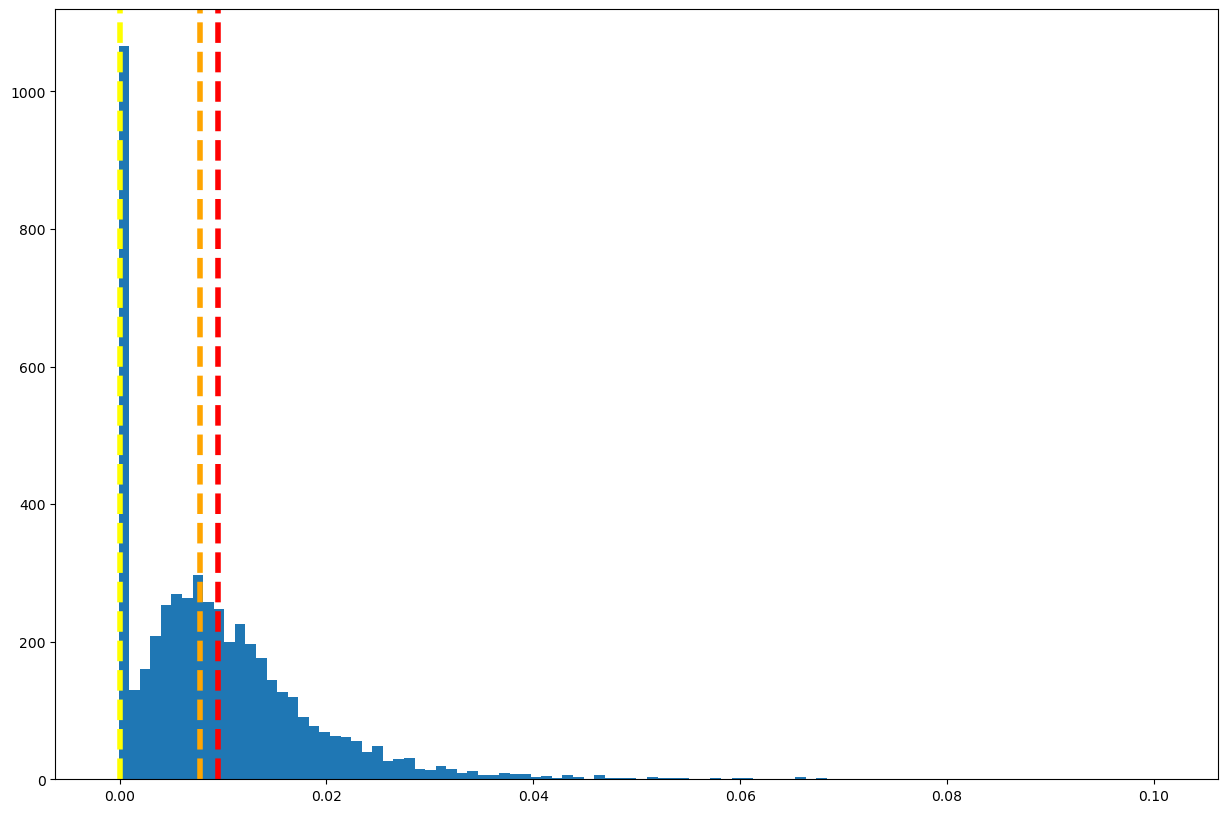

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(15,10))
plt.hist(vola, 100)
plt.axvline(vola.mean(), lw = 4, ls = "--", color = "red") # Arithmetic mean
plt.axvline(vola.median(), lw = 4, ls = "--", color = "orange") # Median
plt.axvline(list(vola.mode()), lw = 4, ls = "--", color = "yellow") # Mode of the distribution (returns a dataseries)
plt.show()

By the way: If you need to compare multiple distributions of some quantities, e.g. the volatility of various cryptocurrencies, boxplots are a good start. They include key information such as the median (orange line), the range between the upper and lower quartiles that contain 50% of all values as box surrounding the orange line, 1.5 times the quartiles as *whiskers* to visualize the spread of most of the values plus outliers as individual dots:

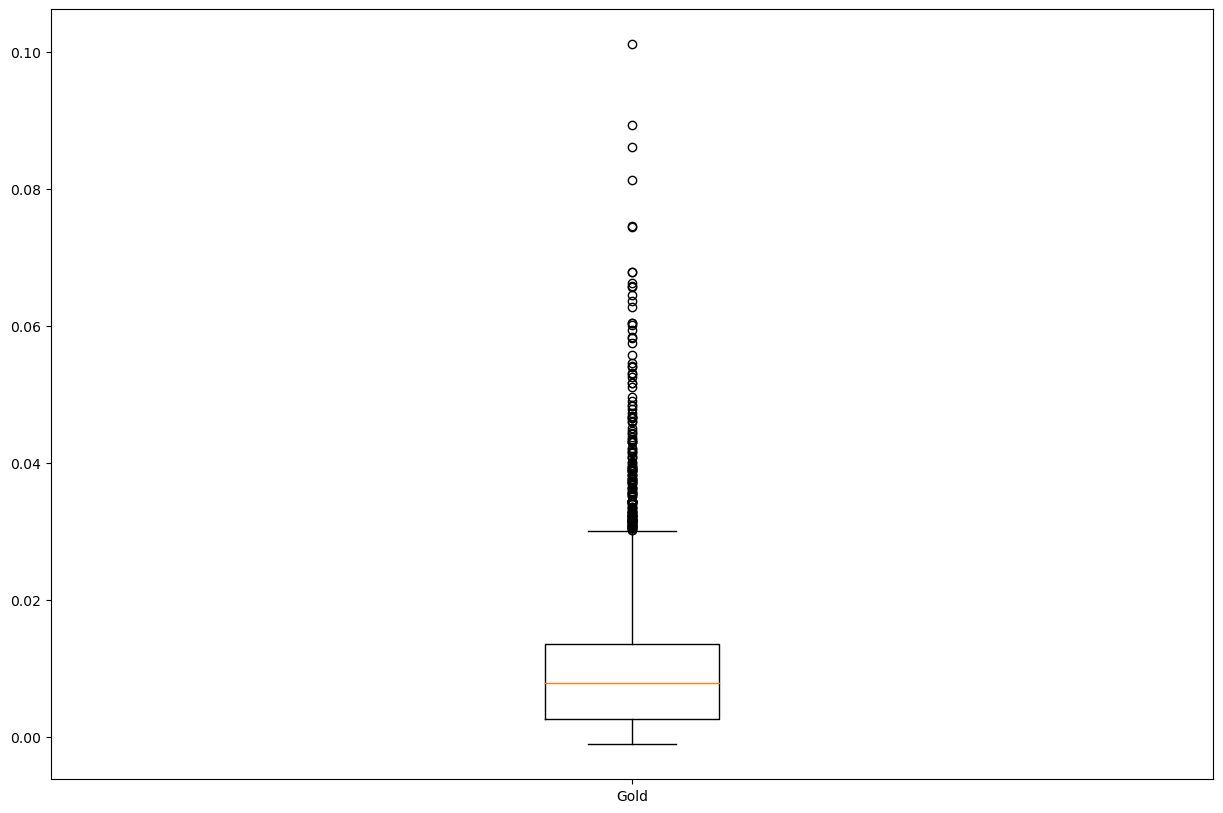

In [32]:
plt.figure(figsize=(15,10))
plt.boxplot(results["Volatility"].dropna(), labels=["Gold"])
plt.show()